In [182]:
import pandas as pd
from urllib.request import urlretrieve
import plotly.express as px
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#%matplotlib inline

medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
urlretrieve(medical_charges_url, 'medical.csv')
medical_df = pd.read_csv('medical.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [181]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


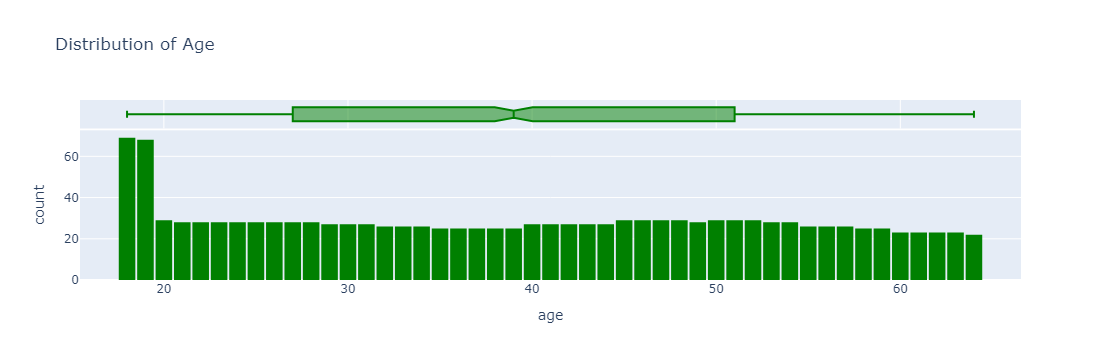

In [39]:
sns.set_style('ticks')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
fig = px.histogram(medical_df, 
                x='age', 
                marginal='box', 
                nbins=47, 
                color_discrete_sequence=["green"],
                title='Distribution of Age')
                
fig.update_layout(bargap=0.1)
fig.show()

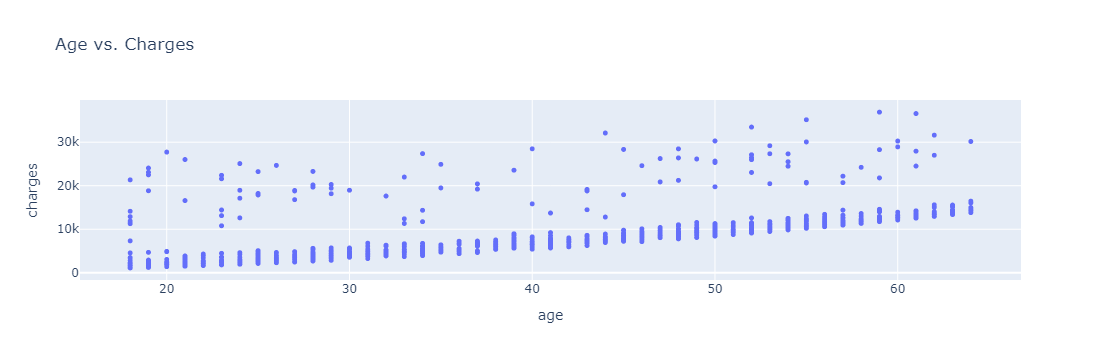

In [95]:
fig = px.scatter(non_smoker_df, 
                 x='age', 
                 y='charges',
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [81]:
smoker_values = {
    'no': 0,
    'yes':1
}
smoker_numeric = medical_df.smoker.map(smoker_values)
non_smoker_df = medical_df[medical_df.smoker == 'no']

Text(0, 0.5, 'Estimated Charges')

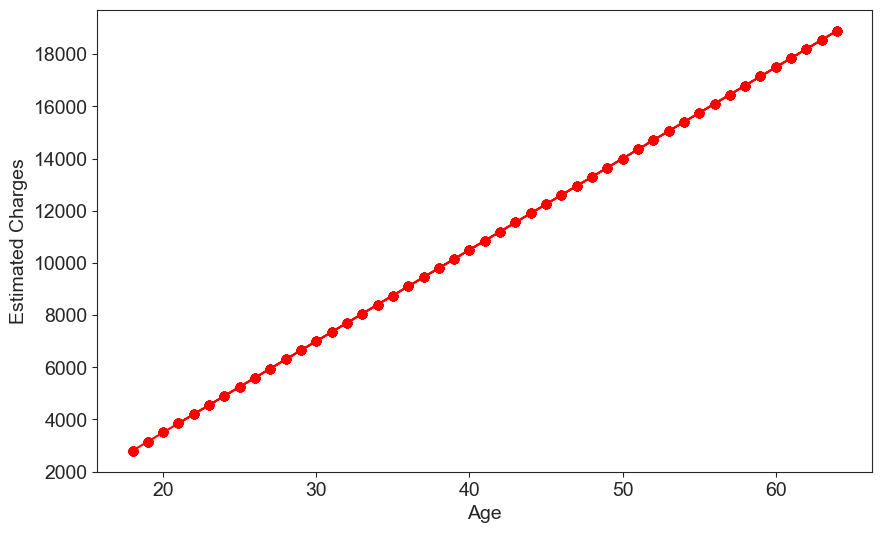

In [142]:
def estimate_charges(age, w, b):
    return w * age + b
ages = non_smoker_df.age

plt.plot(ages, estimated_charges, 'r-o')
plt.xlabel('Age')
plt.ylabel('Estimated Charges')


RMSE Loss: 4662.505766636395


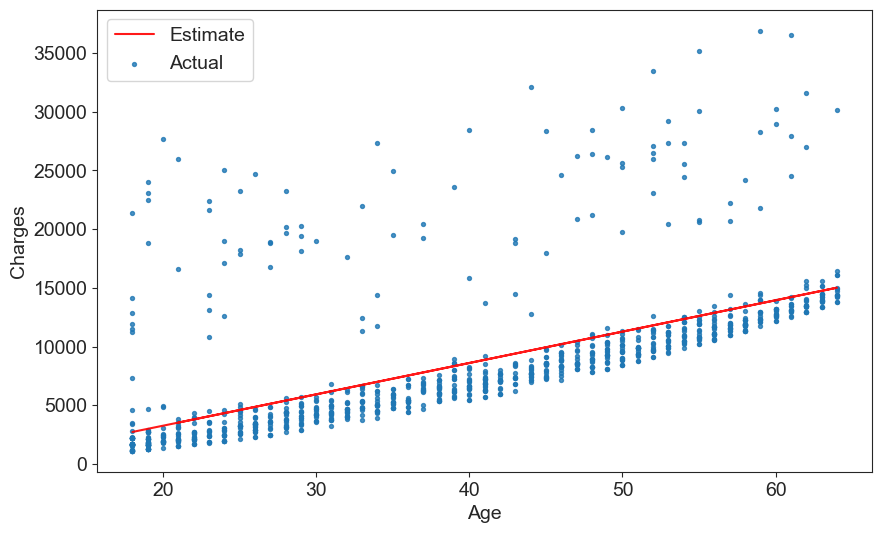

In [190]:
w = 267.24891283
b = -2091.4205565650864
estimated_charges = estimate_charges(ages, w, b)
predicted = estimate_charges(non_smoker_df.age, w, b)
def rmse(targets, predictions):
    return (np.sqrt(np.mean(np.square(targets - predictions))))
def try_parameter(innerW, innerB):
    target = non_smoker_df.charges
    estimated_charges = estimate_charges(ages, innerW, innerB)
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8, alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);
    loss = rmse(target, predicted)
    print('RMSE Loss:', loss)

try_parameter(w, b)

In [183]:
model = LinearRegression()

inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)
model.fit(inputs, targets)
model.predict(np.array([[23], 
                        [37], 
                        [61]]))
predictions = model.predict(inputs)
predictions

inputs.shape : (1064, 1)
targes.shape : (1064,)


C:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [169]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [177]:
rmse(targets, predictions)

4662.505766636395

RMSE Loss: 10729.283030534541


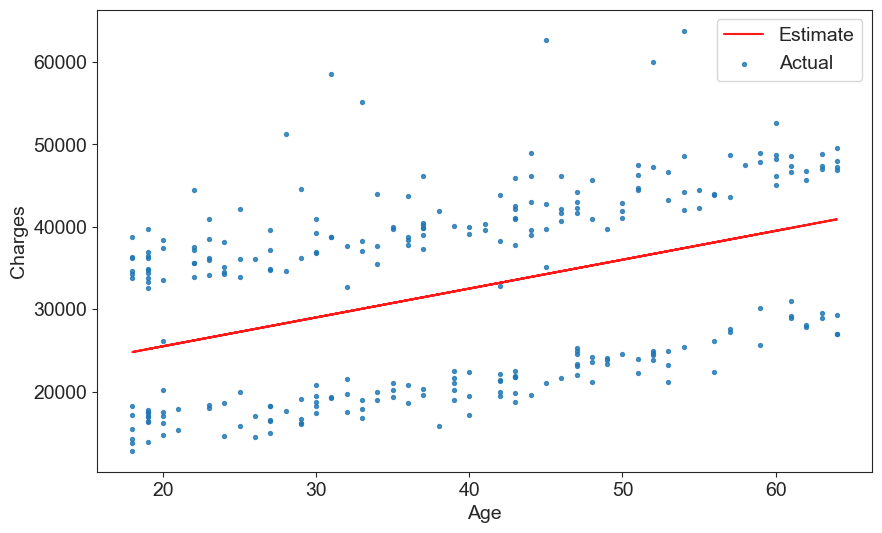

In [199]:
smoker_df = medical_df[medical_df.smoker == 'yes']
w = 350
b = 18500
ages = smoker_df.age
estimated_charges = estimate_charges(ages, w, b)
predicted = estimate_charges(smoker_df.age, w, b)
def try_smoker_parameter(innerW, innerB):
    target = smoker_df.charges
    estimated_charges = estimate_charges(ages, innerW, innerB)
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8, alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);
    loss = rmse(target, predicted)
    print('RMSE Loss:', loss)

try_smoker_parameter(w, b)

In [193]:
model = LinearRegression()

inputs = smoker_df[['age']]
targets = smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)
model.fit(inputs, targets)
model.predict(np.array([[23], 
                        [37], 
                        [61]]))
predictions = model.predict(inputs)
predictions

inputs.shape : (274, 1)
targes.shape : (274,)


C:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([26093.642567  , 39218.85945773, 28535.54338388, 29451.25619021,
       30672.20659865, 29756.49379232, 27009.35537333, 28840.78098599,
       30977.44420076, 38608.38425351, 31282.68180287, 34945.53302819,
       31282.68180287, 37997.90904929, 25788.40496489, 36471.72103874,
       26398.88016911, 28840.78098599, 28535.54338388, 27009.35537333,
       31587.91940498, 34029.82022186, 37692.67144718, 38303.1466514 ,
       39829.33466195, 37387.43384507, 31893.15700709, 38913.62185562,
       26398.88016911, 39524.09705984, 29146.0185881 , 33724.58261975,
       26093.642567  , 30061.73139443, 30672.20659865, 29451.25619021,
       34335.05782397, 33114.10741553, 34945.53302819, 25788.40496489,
       29451.25619021, 33114.10741553, 25788.40496489, 39524.09705984,
       31282.68180287, 28535.54338388, 30977.44420076, 26093.642567  ,
       33114.10741553, 32503.63221131, 26093.642567  , 27314.59297544,
       39524.09705984, 25788.40496489, 39524.09705984, 36776.95864085,
      

In [194]:
targets

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [195]:
rmse(targets, predictions)

10711.00334810241